# Определение перспективного тарифа для телеком компании

Необходимо провести анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше, «Смарт» или «Ультра».



## Изучение данных

Импорт файлов и общая информация:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
pd.options.display.max_columns = None
import numpy as np
from scipy import stats as st

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Данные о звонках:

In [2]:
calls.info()
calls.describe()
calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Данные об использовании интернет-трафика:

In [3]:
internet.info()
internet.describe()
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Данные о сообщениях:

In [4]:
messages.info()
messages.describe()
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Информация о тарифах:

In [5]:
tariffs.info()
tariffs.describe()
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Информация о клиентах:

In [6]:
users.info()
users.describe()
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


### Выводы

Пропущенные значения имееются только в таблице с информацией о пользователях, по столбцу "Дата прекращения использования тарифа", по условию эти данные не заполнены, если клиент продолжает использовать тариф. 

После объединения датафреймов проверю пропущенные значения еще раз.

Требуется замена данных во всех массивах со столбцами, содержащими даты. 
Необходимо округлить длительность интернет-сессий до Гб. 

## Предобработка данных

### Изменение типов данных

Изменю тип данных для массивов 'calls', 'messages', 'internet' по столбцам дата звонка/сообщения/использования интернета: 

In [7]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT%H:%M:%S')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT%H:%M:%S')

А также в массиве 'users' для дат подключения и отключения тарифа:

In [8]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%dT%H:%M:%S')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%dT%H:%M:%S')

Для столба 'calls' изменю тип данных в столбце 'duration' на целочисленный, с округлением вверх:

In [9]:
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int')

### Обработка дубликатов

Проверю наличие дублей в каждом датафрейме:

In [10]:
calls.duplicated().sum()

0

Дубли в 'calls' отсутствуют

In [11]:
messages.duplicated().sum()

0

Дубли в 'messages' отсутствуют

In [12]:
internet.duplicated().sum()

0

Дубли в 'internet' отсутствуют

In [13]:
tariffs.duplicated().sum()

0

Дубли в 'tariffs' отсутствуют

In [14]:
users.duplicated().sum()

0

Дубли в 'users' отсутствуют

### Подготовка пользовательских данных

#### Рассчитаем количество израсходованных минут, сообщений и трафика по месяцам для каждого клиента:

Добавлю столбец с номером месяца в массив 'calls':

In [15]:
calls['month'] = calls['call_date'].dt.month

А теперь сгруппирую массив по сумме израсходованных минут каждым пользователем в каждый месяц:

In [16]:
calls_sum = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
calls_count = calls.groupby(['user_id', 'month'])['duration'].count().reset_index()
calls_count = calls_count.rename(columns = {'duration':'count_calls'})
calls_group = calls_sum.merge(calls_count, on = ['user_id', 'month'], how = 'outer')
calls_group

,user_id,month,duration,count_calls
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
...,...,...,...,...
3169,1498,10,247,41
3170,1499,9,70,9
3171,1499,10,449,68
3172,1499,11,612,74


Сделаю тоже самое для массивов 'messages' и 'internet'

In [17]:
internet['month'] = internet['session_date'].dt.month
internet_group = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

In [18]:
messages['month'] = messages['message_date'].dt.month
messages_group = messages.groupby(['user_id', 'month'])['id'].count().reset_index().rename(columns = {'id':'messages'})

Объединю полученные данные:

In [19]:
data = calls_group.merge(internet_group, on = ['user_id', 'month'], how = 'outer')
data = data.merge(messages_group, on = ['user_id', 'month'], how = 'outer')
data


,user_id,month,duration,count_calls,mb_used,messages
0,1000,5,159.0,22.0,2253.49,22.0
1,1000,6,172.0,43.0,23233.77,60.0
2,1000,7,340.0,47.0,14003.64,75.0
3,1000,8,408.0,52.0,14055.93,81.0
4,1000,9,466.0,58.0,14568.91,57.0
...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11050.56,17.0
3210,1489,9,NaN,NaN,17206.30,32.0
3211,1489,10,NaN,NaN,19559.44,21.0
3212,1489,11,NaN,NaN,17491.56,20.0


Полученные данные необходимо объединить с данными о пользователях и тарифах, для этого необходимо переименовать столбец 'tariff_name' в tariffs:

In [20]:
tariffs = tariffs.rename(columns = {'tariff_name': 'tariff'})

Теперь все данные можно собрать в один массив:

In [21]:
data = data.merge(users, on = ['user_id'], how = 'outer').reset_index()
data = data.merge(tariffs, on = ['tariff'], how = 'outer')
data.head()

,index,user_id,month,duration,count_calls,mb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,0,1000,5.0,159.0,22.0,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1,1000,6.0,172.0,43.0,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,2,1000,7.0,340.0,47.0,14003.64,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,3,1000,8.0,408.0,52.0,14055.93,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,4,1000,9.0,466.0,58.0,14568.91,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
index                    3216 non-null int64
user_id                  3216 non-null int64
month                    3214 non-null float64
duration                 3174 non-null float64
count_calls              3174 non-null float64
mb_used                  3203 non-null float64
messages                 2717 non-null float64
age                      3216 non-null int64
churn_date               189 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per

Заменю все пропуски в длительности разговоров, сообщений и интернет-трафика на 0, отсутствие данных говорит о том, что клиент не использовал услугу.


In [23]:
data['mb_used'] = data['mb_used'].fillna(0)
data['messages'] = data['messages'].fillna(0)
data['duration'] = data['duration'].fillna(0)
data['count_calls'] = data['count_calls'].fillna(0)
data['minutes_over'] = data['minutes_over'].fillna(0)
data

KeyError: 'minutes_over'

#### Расчёт ежемесячной выручки для каждого пользователя:

Рассчитаю сумму, которую оплатит клиент, если превысит пакет предоставленных минут и сообщений:

In [24]:
data['minutes_over'] = (data['duration'] - data['minutes_included']) *  data['rub_per_minute']
data['messages_over'] = (data['messages'] - data['messages_included']) *  data['rub_per_message']

Для расчёта оплаты интернет-трафика, потраченного сверх тарифа, необходимо мб перевести в Гб, а затем округлить вверх до целого числа:

In [25]:
data['mb_over'] = np.ceil((data['mb_used'] - data['mb_per_month_included']) / 1024)

Расчёт суммы оплаты сверх пакет: 

In [26]:
data['mb_over'] = data['mb_over'] *  data['rub_per_gb']

При использовании такого способа расчёта у ряда клиентов, не превысивших пакеты по тарифу, суммы для оплаты стали меньше 0, это ошибка, скорректирую данные, заменив их на 0, так как переплата отсутствует:

In [27]:
data.loc[data['minutes_over'] < 0, 'minutes_over'] = 0
data.loc[data['messages_over'] < 0, 'messages_over'] = 0
data.loc[data['mb_over'] < 0, 'mb_over'] = 0

Рассчитаем итоговую прибыль по каждому клиенту в месяц:

In [28]:
data['income'] = data['rub_monthly_fee'] + data['minutes_over'] + data['messages_over'] + data['mb_over']
data

,index,user_id,month,duration,count_calls,mb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over,messages_over,mb_over,income
0,0,1000,5.0,159.0,22.0,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1,1000,6.0,172.0,43.0,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,2,1000,7.0,340.0,47.0,14003.64,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,3,1000,8.0,408.0,52.0,14055.93,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,4,1000,9.0,466.0,58.0,14568.91,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,3210,1489,9.0,0.0,0.0,17206.30,32.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0.0,400.0,950.0
3212,3211,1489,10.0,0.0,0.0,19559.44,21.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0.0,1000.0,1550.0
3213,3212,1489,11.0,0.0,0.0,17491.56,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0
3214,3213,1489,12.0,0.0,0.0,17322.51,35.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0.0,400.0,950.0


Проверю не появились ли пропуски в других столбцах, после группировки данных:

In [29]:
data.isna().sum()

index                       0
user_id                     0
month                       2
duration                    0
count_calls                 0
mb_used                     0
messages                    0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
minutes_over                0
messages_over               0
mb_over                     0
income                      0
dtype: int64

Пропуски отсутствуют :)

### Выводы

Данные сгруппированы по каждому клиенту и месяцам.
Рассчитала переплату для каждого клиента сверх абонентской платы, а также общую прибыль за месяц.

## Анализ данных

Выделю в отдельные массивы данные по тарифам "Смарт" и "Ультра":

In [30]:
data_smart = data.query('tariff == "smart"')
len(data_smart)

2230

In [31]:
data_ultra = data.query('tariff == "ultra"')
len(data_ultra)

986

### Анализ длительности разговоров и количества звонков по каждому тарифу по каждому тарифу:

Рассчитаю среднюю продолжительность длительности разговоров в месяц для каждого тарифа

In [32]:
print('Среднее количество использованных минут у пользователей тарифа "Смарт": {:.2f}'.format(data_smart['duration'].mean()))
print('Среднее количество использованных минут у пользователей тарифа "Ультра": {:.2f}'.format(data_ultra['duration'].mean()))

Среднее количество использованных минут у пользователей тарифа "Смарт": 417.75
Среднее количество использованных минут у пользователей тарифа "Ультра": 526.09


Рассчитаю дисперсию:

In [33]:
variance_estimate_smart_min = np.var(data_smart['duration'], ddof=1)
print('Дисперсия длительности разговоров по тарифу "Смарт": {:.2f}'.format(variance_estimate_smart_min))
variance_estimate_ultra_min = np.var(data_ultra['duration'], ddof=1)
print('Дисперсия длительности разговоров по тарифу "Ультра": {:.2f}'.format(variance_estimate_ultra_min))

Дисперсия длительности разговоров по тарифу "Смарт": 36281.39
Дисперсия длительности разговоров по тарифу "Ультра": 101052.49


И стандартное отклонение:

In [34]:
standard_deviation_smart_min = np.sqrt(variance_estimate_smart_min)
print('Стандартное отклонение длительности для тарифа "Смарт": {:.2f}'.format(standard_deviation_smart_min))
standard_deviation_ultra_min = np.sqrt(variance_estimate_ultra_min)
print('Стандартное отклонение длительности для тарифа "Ультра": {:.2f}'.format(standard_deviation_ultra_min))

Стандартное отклонение длительности для тарифа "Смарт": 190.48
Стандартное отклонение длительности для тарифа "Ультра": 317.89


Построю гистограммы:

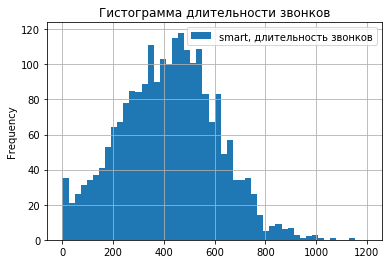

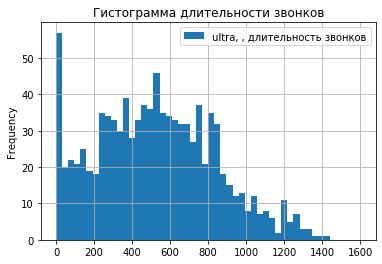

In [35]:
data_smart.plot(kind = 'hist', y='duration', title= 'Гистограмма длительности звонков', label = 'smart, длительность звонков', bins = 50, range = (0, 1200), grid = True)
data_ultra.plot(kind = 'hist', y='duration', title= 'Гистограмма длительности звонков', label = 'ultra, , длительность звонков', bins = 50, range = (0, 1600), grid = True)

**Вывод:**

Пользователи тарифа "Смарт" в среднем тратят 480-550 минут в месяц(чаще всего от 250 до 600 минут).
20% клиентoв не хватает пакета минут по тарифу.

Пользователи тарифа "Ультра" не превышают пакет предоставленных минут, и в среднем используют от 220 до 900 минут.


Рассчитаю среднее количество звонков в месяц для каждого тарифа:

In [36]:
data.groupby('tariff').count_calls.agg(['mean','var','std']).style.format('{:.2f}')

,mean,var,std
tariff,,,
smart,58.44,674.11,25.96
ultra,73.32,1932.19,43.96


Построю гистограммы:

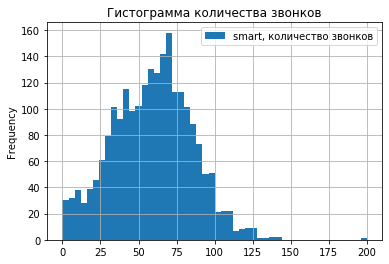

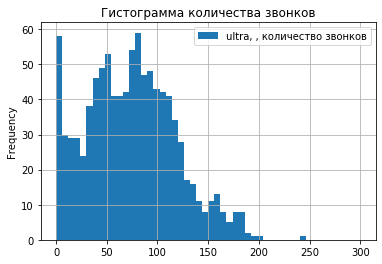

In [37]:
data_smart.plot(kind = 'hist', y='count_calls', title= 'Гистограмма количества звонков', label = 'smart, количество звонков', bins = 50, range = (0, 200), grid = True)
data_ultra.plot(kind = 'hist', y='count_calls', title= 'Гистограмма количества звонков', label = 'ultra, , количество звонков', bins = 50, range = (0, 300), grid = True)

**Вывод:**

Пользователи тарифа "Смарт" в среднем совершают около 70 звонков в месяц(чаще всего от 30 до 85).
1-2 звонка в день.

Пользователи тарифа "Ультра" звонят чуть чаще, в среднем совершают от 40 до 120 звонков в месяц.


### Анализ количества использованных  сообщений по каждому тарифу:

Рассчитаю среднее количество использованных  сообщений в месяц для каждого тарифа

In [38]:
print('Среднее количество использованных сообщений у пользователей тарифа "Смарт": {:.2f}'.format(data_smart['messages'].mean()))
print('Среднее количество использованных сообщений у пользователей тарифа "Ультра": {:.2f}'.format(data_ultra['messages'].mean()))

Среднее количество использованных сообщений у пользователей тарифа "Смарт": 33.37
Среднее количество использованных сообщений у пользователей тарифа "Ультра": 49.31


Расчёт дисперсии:

In [39]:
variance_estimate_smart_sms = np.var(data_smart['messages'], ddof=1)
print('Дисперсия количества использованных сообщений по тарифу "Смарт": {:.2f}'.format(variance_estimate_smart_sms))
variance_estimate_ultra_sms = np.var(data_ultra['messages'], ddof=1)
print('Дисперсия количества использованных сообщений "Ультра": {:.2f}'.format(variance_estimate_ultra_sms))

Дисперсия количества использованных сообщений по тарифу "Смарт": 796.96
Дисперсия количества использованных сообщений "Ультра": 2285.42


Расчёт стандартного отклонения:

In [40]:
standard_deviation_smart_sms = np.sqrt(variance_estimate_smart_sms)
print('Стандартное отклонение количества сообщений для тарифа "Смарт": {:.2f}'.format(standard_deviation_smart_sms))
standard_deviation_ultra_sms = np.sqrt(variance_estimate_ultra_sms)
print('Стандартное отклонение количества сообщений для тарифа "Ультра": {:.2f}'.format(standard_deviation_ultra_sms))

Стандартное отклонение количества сообщений для тарифа "Смарт": 28.23
Стандартное отклонение количества сообщений для тарифа "Ультра": 47.81


Гистограммы:

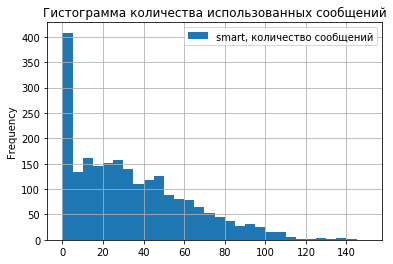

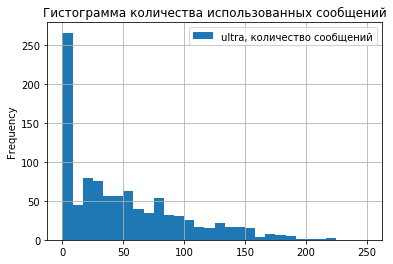

In [41]:
data_smart.plot(kind = 'hist', y='messages', title= 'Гистограмма количества использованных сообщений', label = 'smart, количество сообщений', bins = 30, range = (0, 150), grid = True)
data_ultra.plot(kind = 'hist', y='messages', title= 'Гистограмма количества использованных сообщений', label = 'ultra, количество сообщений', bins = 30, range = (0, 250), grid = True)

**Вывод:**

Пользователи тарифа "Смарт" в среднем используют около 60 сообщений в месяц. 
Около 19% клиентов вообще не пользуются сообщениями, 30% клиентов не хватает 50 сообщений, включенных в тариф.

Пользователи тарифа "Ультра" не превышают пакет сообщений, как правило используют около 75 сообщений в месяц.
Около 30% клиентов не используют сообщения. 


### Анализ количества использованного  интернет-трафика по каждому тарифу:

Рассчитаю среднее количество использованного интернет-трафика в месяц для каждого тарифа:

In [42]:
print('Среднее количество использованного интернет-трафика у пользователей тарифа "Смарт": {:.2f} Мб'.format(data_smart['mb_used'].mean()))
print('Среднее количество использованного интернет-трафика у пользователей тарифа "Ультра": {:.2f} Мб'.format(data_ultra['mb_used'].mean()))

Среднее количество использованного интернет-трафика у пользователей тарифа "Смарт": 16201.12 Мб
Среднее количество использованного интернет-трафика у пользователей тарифа "Ультра": 19449.06 Мб


Дисперсия:

In [43]:
variance_estimate_smart_mb = np.var(data_smart['mb_used'], ddof=1)
print('Дисперсия количества использованного трафика по тарифу "Смарт": {:.2f}'.format(variance_estimate_smart_mb))
variance_estimate_ultra_mb = np.var(data_ultra['mb_used'], ddof=1)
print('Дисперсия количества использованных трафика "Ультра": {:.2f}'.format(variance_estimate_ultra_mb))

Дисперсия количества использованного трафика по тарифу "Смарт": 34564843.48
Дисперсия количества использованных трафика "Ультра": 102032129.46


Стандартное отклонение:

In [44]:
standard_deviation_smart_mb = np.sqrt(variance_estimate_smart_mb)
print('Стандартное отклонение количества использованного трафика для тарифа "Смарт": {:.2f}'.format(standard_deviation_smart_mb))
standard_deviation_ultra_mb = np.sqrt(variance_estimate_ultra_mb)
print('Стандартное отклонение количества использованного трафика для тарифа "Ультра": {:.2f}'.format(standard_deviation_ultra_mb))

Стандартное отклонение количества использованного трафика для тарифа "Смарт": 5879.19
Стандартное отклонение количества использованного трафика для тарифа "Ультра": 10101.10


Гистограммы:

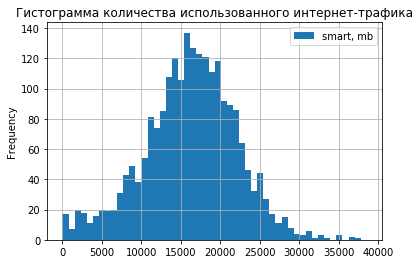

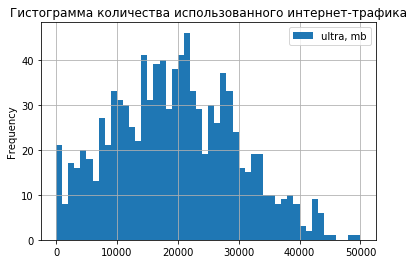

In [45]:
data_smart.plot(kind = 'hist', y='mb_used', title= 'Гистограмма количества использованного интернет-трафика', label = 'smart, mb', bins = 50, range = (0, 38552), grid = True)
data_ultra.plot(kind = 'hist', y='mb_used', title= 'Гистограмма количества использованного интернет-трафика', label = 'ultra, mb', bins = 50, range = (0, 50000), grid = True)

**Вывод:**

Пользователи тарифа "Смарт" чаще всего используют от 11 до 23Гб. 
Большинству клиентов не хватает интернета, предоставленного в пакете по тарифу.

Пользователи тарифа "Ультра" обычно расходуют от 9 до 30 Гб.
Около 15% не хватает, включенного в тариф, объема трафика.


### Выводы

Большей части пользователей тарифа "Смарт" не хватает пакетов, включенных в пакет за абонентскую плату, особенно это заметно на гистограмме использования интернет-трафика. 

Пользователи тарифа "Ультра" редко превышают предоствленные лимиты по услугам, но если это происходит, то, как правило, тоже при использовании интернет-трафика.

Также, хочу отметить, что только 0,2% пользователей тарифа "Ультра" используют более 1500 мин.

Возможно, стоит задуматься о сокращении пакета предоставляемых минут и за счёт этого увеличения пакета интернета.

## Проверка гипотезы

Проверю гипотезы:

        средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
        средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Для оценки гипотезы будем применять тест Стюдента.

H0  — средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».

H1  — средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

α = 5%


In [46]:
ultra_income = data.query('tariff == "ultra"')['income']
smart_income = data.query('tariff == "smart"')['income']

alpha = 0.05
results = st.ttest_ind(smart_income, ultra_income)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    


p-значение:  8.081909555489933e-161
Отвергаем нулевую гипотезу


**Вывод:**

Гипотеза о различии выручки по тарифам "Смарт" и "Ультра" верна.

In [47]:
print('Средняя выручка по пользователям тарифа "Смарт" {:.2f}'.format(smart_income.mean()))
print('Средняя выручка по пользователям тарифа "Ультра" {:.2f}'.format(ultra_income.mean()))

Средняя выручка по пользователям тарифа "Смарт" 1289.64
Средняя выручка по пользователям тарифа "Ультра" 2070.03


Действительно, средняя выручка по клиентам, использующим "Ультра" выше практически в два раза.

### Средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

H0  — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

H1  — средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.

α = 5%

In [48]:
moscow_income = data.query('city == "Москва"')['income']
other_city_income = data.query('city != "Москва"')['income']
alpha = 0.05

results = st.ttest_ind(moscow_income, other_city_income)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    

p-значение:  0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Гипотеза о различии выручки пользователей из Москвы и остальных регионах не подтвердилась.

In [49]:
print('Средняя выручка по пользователям из Москвы {:.2f}'.format(moscow_income.mean()))
print('Средняя выручка по пользователям из других регионов {:.2f}'.format(other_city_income.mean()))

Средняя выручка по пользователям из Москвы 1546.71
Средняя выручка по пользователям из других регионов 1524.73


Действительно, разница не значительна :)

## Общий вывод

В ходе проделанной работы было выполнено:

1. Изучена общая информация по каждой из представленных таблиц.
2. Составлена общая таблица данных о пользователях сети
3. Изменены типы данных для столбцов
4. Добавлены необходимые данные для дальнейших исследований.
5. Проведен сравнительный анализ пользователей тарифов
6. Проверены гипотезы на возможное соотвествие

Предложенные тарифы сильно отличаются друг от друга и их выручка разнится. В первую очередь пользователи тарифа Smart чаще пользователей тарифа Ultra перерасходуют лимиты. Из-за этого выручка по тарифу Smart может казаться большой.
Пользователи тарифа "Смарт" чаще расходуют предоставленные пакеты, что говорит о том, что тариф не подходит большинству клиентов, с тарифом "Ультра" ситуация обратная.

Средняя выручка по каждому тарифу отличается почти в два раза, при этом, зависимости выручки от региона проживания клиента не выявлено.